<br><p style="font-family: Arial; font-size:3.5em;color:purple; font-style:bold">
<br>Data Preparation and Exploration: Pandas</p><br><br>
We are going to use our movie dataset to demonstrate the process of data preparation and exploration with statistics.
1. Read in the dataset and examine basic features, e.g. rows, columns, variables
2. Data preparation: missing data, compound variables, transforming variables
3. Data exploration: filtering, group by, statistics and graphs

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

You can download the dataset from Canvas. For simplicity, save the Zip file to the same folder as your Notebook. Use "Unzip here" to extract it to the same folder.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site
* **Location:** https://grouplens.org/datasets/movielens/


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
1. Read in and examine the data<br>
</p>
<br>
Using the *read_csv* function in pandas, we can import the following CSV files:
<p>ratings.csv :userId,movieId,rating, timestamp</p>
<p>tags.csv :userId,movieId, tag, timestamp</p>
<p>movies.csv : movieId, title, genres</p> <br>

In [2]:
# import the libraries
import pandas as pd
import numpy as np

In [23]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [30]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
tags = pd.read_csv('./ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [31]:
# import ratings
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Number of rows and columns
movies.shape
ratings.shape
tags.shape

(9742, 3)

(100836, 4)

(3683, 4)

In [8]:
# The names of columns (variables)
movies.columns
ratings.columns
tags.columns

Index(['movieId', 'title', 'genres'], dtype='object')

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [11]:
# A useful function to take a first look of the data, info()
movies.info()
ratings.info()
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

In [ ]:
# The object data type is used for any data type other than integer, float, datetime, boolean and categories.
# Strings are considered objects.
# You may change the datatype of a variable using .astype()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
2. Prepare the data for analysis<br>
</p><br>

### 1) drop irrelevant variables

In [12]:
# For current analysis, we will remove timestamp
# Two ways to drop variables. drop() for DataFrame
tags.drop('timestamp', axis = 1, inplace = True)
tags.head()

# To keep the changes for the original dataset, inplace = True needs to be turned on.

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [13]:
# del of Python
del ratings['timestamp']
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### 2) Handling missing data

In [15]:
# identify whether there are missing values
movies.isnull()
movies.isnull().any()

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9737,False,False,False
9738,False,False,False
9739,False,False,False
9740,False,False,False


movieId    False
title      False
genres     False
dtype: bool

In [ ]:
# axis 1 or 0 gives whether there are missing values for each row or each column
# Default value for any() is axis = 0
movies.isnull().any(axis = 0)
movies.isnull().any(axis = 1)

In [16]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [17]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

### If there are missing values:
<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Choice 1: drop missing values</p>
<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Choice 2: impute with values</p>

In [ ]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy']),
    'three': pd.Series(['Yes','No','Yes'], index = ['apple', 'ball', 'cerill'])}
df1 = pd.DataFrame(d)
df1

In [ ]:
# Use our first dataframe as example
df1.isnull().any()

In [ ]:
# Choice 1: dropna()
df1.dropna()

In [ ]:
# Choice 2: numerical variable - impute with mean or median
df1['one'] = df1['one'].fillna(df1['one'].mean())
df1['two'] = df1['two'].fillna(df1['two'].median())
df1

In [ ]:
# value_counts count the number of observations for each category.
# the index of the first element in the output series is the one with most observations
# so we can select the index as the fillna() value
df1['three'].value_counts().index[0]

In [ ]:
# Choice 2: categorical variable - impute with most common class
df1['three'] = df1['three'].fillna(df1['three'].value_counts().index[0])
df1

In [ ]:
df1['three'].fillna('x', inplace = True)
df1

In [ ]:
a = df1['three'].mode()
a

### 3) prepare variables for analysis

<h1 style="font-size:1.5em;color:#2467C0">For the movie table: working with strings</h1>

In [29]:
# For the movies table, what do we need to do?
# 1. Variable 'genres': it is compound, meaning several values are integrated together.
# Solution: to seperate the genres and code them into dummy variables. 
# First, we need to process the string by seperating them and create dummies.
# Luckily, we have a powerful function for strings: str.get_dummies()
dummies = movies['genres'].str.get_dummies('|')
dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# To integrate the dummies back to the original dataset. 
# There is no common column to join. So, we can join them by the index.
newmovies = pd.merge(movies, dummies, left_index = True, right_index = True)
newmovies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 2. Check movie title. It is also compound because the year is mixed with the title.
# We need to extact Year out of title to create a new column.
# Using regular expression to specify the match content.
# Using extract() to extract the matches.
# It extracts groups specified in the regular expression and create new variables. One column per group.
# expand = True adds the columns to the dataframe.
movies['year'] = movies['title'].str.extract('.*\(([0-9]*)\)', expand = True)
movies.head()

In [25]:
movies['year'] = movies['title'].str.extract('\(([0-9]*)\)', expand = True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [26]:
# 3. Now we can remove the year in the movie title
movies['title'] = movies['title'].str.replace('\(\d*\)', '')
movies.head()
# To keep the change, we need to assign the replaced value back to the variable.

<ipython-input-26-1c289ab45d0d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['title'] = movies['title'].str.replace(' \(\d*\)', '')


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [24]:
movies['title'].str.replace('\(\d*\)', '')
movies.head()

<ipython-input-24-d405a92706d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['title'].str.replace('\(\d*\)', '')


0                                Toy Story 
1                                  Jumanji 
2                         Grumpier Old Men 
3                        Waiting to Exhale 
4              Father of the Bride Part II 
                       ...                 
9737    Black Butler: Book of the Atlantic 
9738                 No Game No Life: Zero 
9739                                 Flint 
9740          Bungo Stray Dogs: Dead Apple 
9741          Andrew Dice Clay: Dice Rules 
Name: title, Length: 9742, dtype: object

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
# 4. To further clean the title column, strip the whitespaces
movies['title'] = movies['title'].str.strip()
movies.iloc[0,1]
# All the string functions work with pandas.Series. The format is pandas.Series.str....()

'Toy Story'

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>
    
For operations with strings in Pandas, more here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:1.5em;color:#2467C0">For tags and ratings tables: working with time</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

In this case, the timestamp is recorded as Unix time / POSIX time / epoch time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

### 1). Parsing timestamps

In [32]:
tags.head()
# Parsing the timestamp
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit = 's')
tags.head()
# The unit is 's' - second; there is also ms-milisecond, ns-nanosecond and more.

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [73]:
# to_datetime function return the value in datetime data type.
tags['parsed_time'].dtype
tags['timestamp'].dtype

dtype('<M8[ns]')

dtype('int64')

### 2) operations with time

In [72]:
# 1. datetime can be compared. The later the time, the larger the value.
# Select rows based on time
# For instance, select tags made after 2015-01-01
after2015 = tags['parsed_time'] > '2015-01-01'
tags[after2015].head()

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [ ]:
# 2. Datetime components can be processed separately using DatetimeIndex() to change datetime to an DatetimeIndex object.
# Year, month, date, time, etc. can all be called as attribute of DatetimeIndex.
tags['month'] = pd.DatetimeIndex(tags['parsed_time']).month
tags.head()

In [ ]:
# 3. Time is often an important variable, as many activities and outcomes can be associated with time. For instance,
# the sales of seasonal products.
# Create a season variable based on month
# lambda function is good to apply operations to variables
tags['season'] = tags['month'].apply(lambda x: 'Spring' if 2<x<6 else
                                    ('Summer' if 5<x<9 else
                                     ('Fall' if 8<x<12 else 'Winter')
                                    )
                                   )
# Or if the lambda function is too complex, we can define a regular function and apply it.
'''
def season(x):
    if 2<x<6:
        return 'Spring'
    elif:
        
    elif:
        
    else:
'''
tags.head()
tags.tail()

<h1 style="font-size:2em;color:#2467C0">Data Exploration</h1>

<p>Data exploration is the process of understanding and describing the data. We intend to describe variables and answer descriptive questions such as "what is the average rating of all movies?", "How many 1995 movies in the dataset?", "How many movies of "Animation" genre?", "Is there a relationship between price and sales?"</p>
<p>To achieve these goals, we need the following tools:</p>
1. To select proper subset of the whole dataset: filtering rows<br>
2. To aggregate data into groups and get statistics<br>
3. Pivot tables<br>
4. Distribution of variables: statistics and graphs<br>
5. Relationships between variables: statistics and graphs<br>

<h1 style="font-size:1.5em;color:#2467C0">1. Filters to select subsets</h1>

### Q1. Select movies with high ratings and genre 'Animation'.

In [33]:
# Merge movies and ratings together
movie_rating = pd.merge(movies, ratings, on = 'movieId', how = 'inner')
movie_rating.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [34]:
# Select movies with high ratings
highly_rated = movie_rating['rating']>=4 # The comparison creates a series of True/False
movie_rating[highly_rated].head() # True/False as a filter to select

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
6,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0,965705637


In [35]:
# Select animation movies
animation = movie_rating['genres'].str.contains('Animation')
movie_rating[animation][5:15]

,movieId,title,genres,year,userId,rating,timestamp
5,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,18,3.5,1455209816
6,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0,965705637
7,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,21,3.5,1407618878
8,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,27,3.0,962685262
9,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,31,5.0,850466616
10,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,32,3.0,856736119
11,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,33,3.0,939647444
12,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,40,5.0,832058959
13,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,43,5.0,848993983
14,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,44,3.0,869251860


In [36]:
# Multiple filters; use "&" and "|"
goodanimation = movie_rating[highly_rated & animation]
goodanimation.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
6,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0,965705637


<h1 style="font-size:1.5em;color:#2467C0">2. Group By and Aggregate </h1>

### Q2. How many movies in each rating level?

In [39]:
# the groupby() function returns a tuple, the group value and the data frame that is in accordance with the value
# As you may see below
for group, frame in ratings.groupby('rating'):
    print(group,'\n' ,frame)
# use an aggregation function to the groupby object will apply the function to all other variables in the data frame.
ratings.groupby('rating').count()

0.5 
         userId  movieId  rating   timestamp
261          3       31     0.5  1306463578
262          3      527     0.5  1306464275
263          3      647     0.5  1306463619
264          3      688     0.5  1306464228
265          3      720     0.5  1306463595
...        ...      ...     ...         ...
99394      608     6827     0.5  1117519648
99408      608     7004     0.5  1117506252
100345     610    61818     0.5  1493848943
100415     610    72424     0.5  1493849030
100797     610   145951     0.5  1493849019

[1370 rows x 4 columns]
1.0 
         userId  movieId  rating   timestamp
205          1     3176     1.0   964983504
308          4      126     1.0   986848920
314          4      222     1.0   945629040
320          4      296     1.0   945173350
329          4      441     1.0   986934915
...        ...      ...     ...         ...
100060     610     8840     1.0  1479542247
100296     610    56801     1.0  1493845711
100374     610    68319     1.0  149384

,userId,movieId,timestamp
rating,,,
0.5,1370,1370,1370
1.0,2811,2811,2811
1.5,1791,1791,1791
2.0,7551,7551,7551
2.5,5550,5550,5550
3.0,20047,20047,20047
3.5,13136,13136,13136
4.0,26818,26818,26818
4.5,8551,8551,8551


In [ ]:
# If we only need to aggregate certain variables, there are two ways
# 1. Select the variables to aggregate: before or after
ratings[['movieId', 'rating']].groupby('rating').count()
ratings.groupby('rating')[['movieId']].count()
# 2. Specify in an agg()
ratings.groupby('rating').agg({'movieId': 'count'})

### Q3. How many ratings does each movie have? What is the average rating for each movie?

In [ ]:
# Find the total number of ratings for each movie
countbymovie = ratings[['movieId','rating']].groupby('movieId').count()
countbymovie.head()

In [ ]:
#Average rating of each movie
avg_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()
avg_rating

In [ ]:
movies.merge(avg_rating, on = 'movieId', how = 'inner')

<h1 style="font-size:1.5em;color:#2467C0">3. Pivot Tables</h1>
A pivot table is a table of grouped values that aggregates individual items within one or more discrete categories. When you need to group by across multiple variables, it is easier to use pivot tables.<br>
We use the Titanic dataset to demonstrate pivot tables.

In [41]:
import seaborn as sns
titanic=sns.load_dataset('titanic')

In [42]:
#Check the data
titanic.head()
titanic.info()
titanic.describe().transpose()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# Q1. Is there any difference between the survival rate of men and women?
# What are the groups? Which value to aggregate?
# Option 1: we can use groupby() to group by gender and caculate the survival rate for each group.
titanic.groupby('sex')[['survived']].mean()

In [ ]:
# Option 2: Pivot table
titanic.pivot_table('survived',index='sex')

In [87]:
# Pivot table makes multi-dimensional cross-tabbing easier
# To add one more dimension, survival rate of different genders in different cabin classes.
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# If we use groupby for this
titanic.groupby(['sex','class'])['survived'].mean().unstack()

In [88]:
# We add one more dimension: age.
# To make pivot table with a continuous variable, we bin the variable first to turn it into categoies. 
# We used a function to do that in last class; cut() can also do that.
# Based on age, passengers are labeled as child vs. adult
ageCat=pd.cut(titanic['age'],[0,18,80], labels = ['child','adult'])
ageCat

0      adult
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887    adult
888      NaN
889    adult
890    adult
Name: age, Length: 891, dtype: category
Categories (2, object): ['child' < 'adult']

In [89]:
# We can merge the categorical variable back to the data
titanic['ageCat'] = ageCat
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ageCat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


In [90]:
# Pivot table using three variables to tabulate the survival rate
titanic.pivot_table('survived',index=['sex', 'ageCat'],columns='class')

class             First    Second     Third
sex    ageCat                              
female child   0.909091  1.000000  0.511628
       adult   0.972973  0.900000  0.423729
male   child   0.800000  0.600000  0.215686
       adult   0.375000  0.071429  0.133663

In [ ]:
# More options for pivot table
# Specifying different aggregation functions for different variable to aggregate (by default is mean).
# How many survived for different sex and cabin class combinations? 
# What is the average fare for different sex and cabin class combinations?
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':'sum','fare':'mean'})

<h1 style="font-size:1.5em;color:#2467C0">4. Distribution of a variable: numerical variables</h1>

In [91]:
# Statistics for numerical variables
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# Statistics for selected variables
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [60]:
# Statistic functions
titanic['fare'].mean()
titanic['fare'].mode()
titanic['fare'].max()
titanic['fare'].std()

32.2042079685746

0    8.05
dtype: float64

512.3292

49.693428597180905

In [64]:
# correlation
titanic[['fare','age']].corr()
titanic.corr()

,fare,age
fare,1.000000,0.096067
age,0.096067,1.000000


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


array([[<AxesSubplot:title={'center':'fare'}>]], dtype=object)

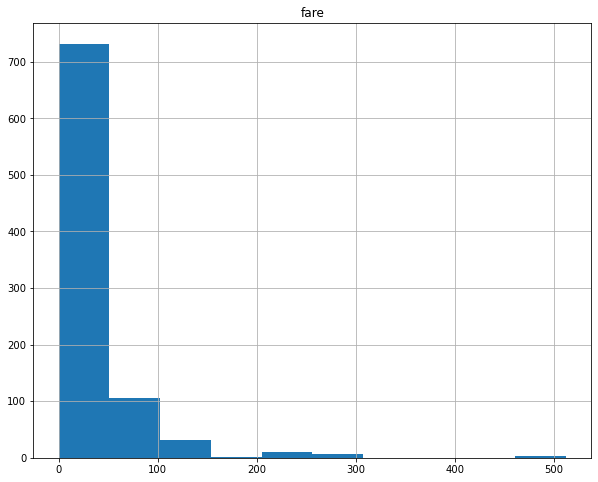

In [43]:
%matplotlib inline 
# This is a "magic function" predefined in "IPython" (Interactive Python) to link Matplotlib in the backend. 
# It embeds images with Notebook. Any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
# Creating a histogram
titanic.hist(column = 'fare', figsize = (10,8))

<AxesSubplot:>

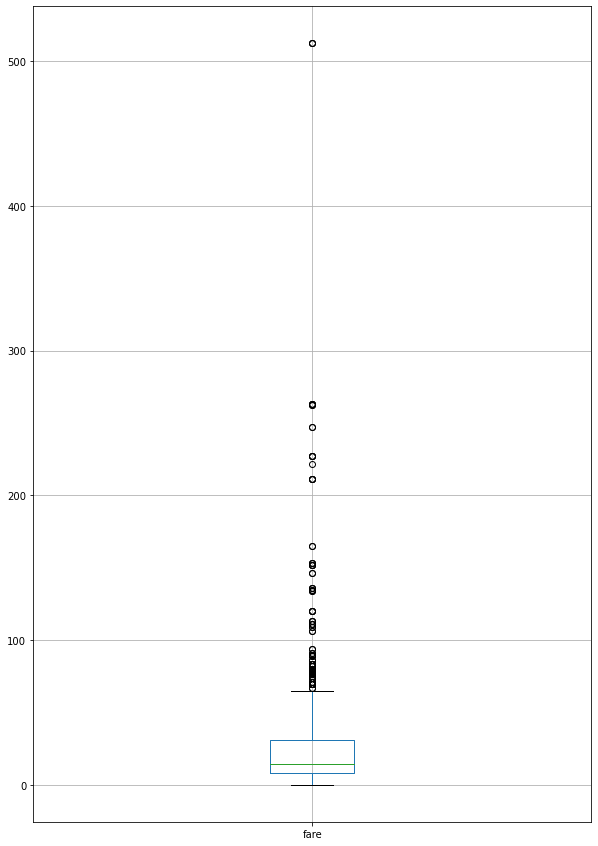

In [68]:
# Creating a boxplot
titanic.boxplot(column = 'fare', figsize = (10,15))

<h1 style="font-size:1.5em;color:#2467C0">5. Distribution of a variable: categorical variables</h1>

In [45]:
# Frequency counts
embark = titanic['embark_town'].value_counts()
embark

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

<AxesSubplot:>

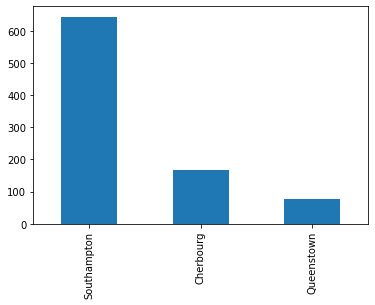

In [46]:
# A bar chart
embark.plot(kind = 'bar')